#### <h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 21 </h1>
<h1><center>  Web scraping e Web Crawling</h1> 
<h1><center> 12 Aprile 2023 </h1>

# Web Scraping o Web Crawling?

* i termini **Web Scraping** e **Web Crawling** sono spesso utilizzati in modo intercambiabile

* in effetti, le due tecniche condividono diverse caratteristiche, ma sono diverse

* **Web Scraping**
    * estrazione di dati da una pagina web o anche da più pagine di un sito web
    * generalmente si individua a priori un insieme di pagine da cui si vuole estrarre informazione, per poi analizzarla
    * esempio
        * una azienda vuole fare ricerche di mercato per lanciare un nuovo prodotto, ad esempio un nuovo laptop
        * estrae da **Amazon** la lista dei laptop sul mercato con il relativo prezzo, per capire come posizionarsi
          sul mercato
        * non limitato ad una pagina, ma ad un insieme di pagine ben determinato
        
* **Web crawling**
    * utilizza **bots** o **spiders** per leggere tutto il contenuto di un sito web e/o di più siti web
    * in genere utilizzato per indicizzare il contenuto di un sito web
    * utilizzato dai search engines (**Google**, **Bing**,...)

# Web Scraping: rating Game of Thrones

* accedere alla seguente pagina web: https://www.imdb.com/title/tt0944947/episodes

* effettuare lo scraping della pagina 
    * reperire il rating di ogni episodio di ogni stagione della serie **"Game of Thrones"**
 
* plottare un barplot in cui si mettono a confronto le valutazione date dagli utenti ai vari episodi di ogni stagione

* si può definire un processo di **web scraping**, perchè 
    * l'insieme delle pagine è ben definito
    * lo scopo è l'analisi di alcune pagine, non la loro indicizzazione

* tuttavia si utilizza di fatto un **bot** che visita tutte le pagine automaticamante

# Web Scraping: rating Game of Thrones

<center>
<img src="Figures/GOTEpisodes.jpg" style="width:700px;height:600px;"/>

# Web Scraping: rating Game of Thrones

* primo passo: individuare la struttura delle **URL** corrispondenti alle diverse pagine web
    * https://www.imdb.com/title/tt0944947/episodes?season=4
* ricordiamo i parametri generali di una **URL**
<center>
<img src="Figures/URL.jpg" style="width:1000px;height:100px;"/>
* la nostra **URL** contiene un parametro **season** che consente di individuare la pagina corrispondente ad ogni stagione

# Web Scraping: rating Game of Thrones

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'
episodes = []
ratings = []
# Iterare su tutte le stagioni di GOT
for season in range(1, 8):
    r = requests.get(url, params={'season': season})
    print (r.request.url)
    print(r)
    

* si costruisce la **parte fissa** della **URL**
* si specifica,  tra i parametri della **get**, il parametro **season**
    * verificare la **URL** creata dalla libreria 
        * ```print (r.request.url)```

# Web Scraping: rating Game of Thrones

* primo passo: ispezionare il sorgente HTML della pagina

<img src="Figures/GOTERating.jpg" style="width:1000px;height:700px;"/>

* dall'analisi dell'**HTML** il campo che identifica il rating di ogni episodio ha classe ```ipl-rating-star_rating```
* ma occorre fare attenzione: ci sono altri elementi identificati da questa classe nel documento?
* proviamo a stampare il contenuto di tutti gli elementi identificati da questa classe

# Web Scraping: rating Game of Thrones

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'
episodes = []
ratings = []
# Iterariamo solo sulla prima stagione, per provare
for season in range(1, 2):
    r = requests.get(url, params={'season': season})
    # scraping
    soup = BeautifulSoup(r.text, 'html.parser')
    for el in soup.findAll(class_='ipl-rating-star__rating'):
        print("**********")
        print(el.get_text())
  

* oltre ai rating vengono stampate parecchia altre informazioni
    * ```ipl-rating-star_rating``` non identifica univocamente i rating
* occorre restringere il contesto in cui si ricerca un oggetto di quella classe

# Web Scraping: rating Game of Thrones

<img src="Figures/GOTERating1.jpg" style="width:1000px;height:600px;"/>

* individuiamo  prima il tag ```<div>``` di classe ```ipl-rating-star small```
* all'interno dello scope del tag individuato cerchiamo poi il rating dei singoli episodi


# Web Scraping: rating Game of Thrones

In [2]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'
episodes = []
ratings = []
# Iterariamo solo sulla prima stagioone, per provare
for season in range(1, 2):
    eprn=0
    r = requests.get(url, params={'season': season})
    # scraping
    soup = BeautifulSoup(r.text, 'html.parser') 
    for div in soup.findAll(class_='ipl-rating-star small'):
        rating_el = div.find(class_='ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print("**********")
        print(rating)
        

**********
8.9
**********
8.6
**********
8.5
**********
8.6
**********
9.0
**********
9.1
**********
9.1
**********
8.9
**********
9.6
**********
9.4


# Web Scraping: rating Game of Thrones

In [3]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'
episodes = []
ratings = []
# Iterare su tutte le stagioni di GOT

for season in range(1, 8):
    r = requests.get(url, params={'season': season})
    # scraping
    soup = BeautifulSoup(r.text, 'html.parser') 
    for epnr, div in  enumerate(soup.findAll(class_='ipl-rating-star small')):
        episode = "{}.{}".format(season, epnr + 1)
        rating_el = div.find(class_='ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print('Episode:', episode, '-- rating:', rating)
        episodes.append(episode)
        ratings.append(rating)
    print("**************************************")


Episode: 1.1 -- rating: 8.9
Episode: 1.2 -- rating: 8.6
Episode: 1.3 -- rating: 8.5
Episode: 1.4 -- rating: 8.6
Episode: 1.5 -- rating: 9.0
Episode: 1.6 -- rating: 9.1
Episode: 1.7 -- rating: 9.1
Episode: 1.8 -- rating: 8.9
Episode: 1.9 -- rating: 9.6
Episode: 1.10 -- rating: 9.4
**************************************
Episode: 2.1 -- rating: 8.6
Episode: 2.2 -- rating: 8.4
Episode: 2.3 -- rating: 8.7
Episode: 2.4 -- rating: 8.6
Episode: 2.5 -- rating: 8.6
Episode: 2.6 -- rating: 8.9
Episode: 2.7 -- rating: 8.8
Episode: 2.8 -- rating: 8.6
Episode: 2.9 -- rating: 9.6
Episode: 2.10 -- rating: 9.3
**************************************
Episode: 3.1 -- rating: 8.6
Episode: 3.2 -- rating: 8.5
Episode: 3.3 -- rating: 8.7
Episode: 3.4 -- rating: 9.5
Episode: 3.5 -- rating: 8.9
Episode: 3.6 -- rating: 8.7
Episode: 3.7 -- rating: 8.6
Episode: 3.8 -- rating: 8.9
Episode: 3.9 -- rating: 9.9
Episode: 3.10 -- rating: 9.1
**************************************
Episode: 4.1 -- rating: 9.0
Episode: 4.2

# Web Scraping: rating Game of Thrones

```
   for epnr, div in  enumerate(soup.findAll(class_='ipl-rating-star small')):
        episode = "{}.{}".format(season, epnr + 1)
        rating_el = div.find(class_='ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print('Episode:', episode, '-- rating:', rating)
        episodes.append(episode)
        ratings.append(rating)
```

* ```enumerate()```
  * aggiunge un indice ad ogni elemento restituito dalla ```findAll()```
  * l'indice viene usato come indice dell'episodio di quella stagione
* ```format```
  * per stampare la stringa ```stagione.numero dell'episodio```

# Rating Game of Thrones: plottare i risultati

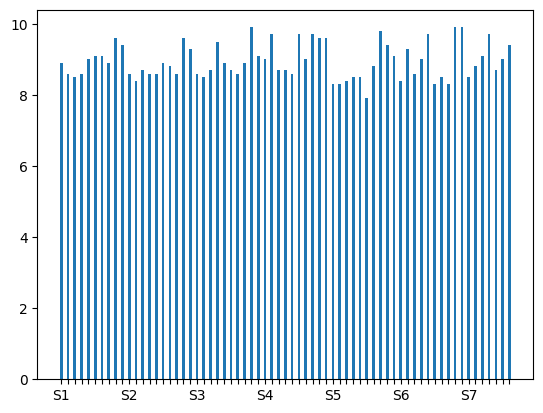

In [4]:
import matplotlib.pyplot as plt
episodes = ['S' + e.split('.')[0] if int(e.split('.')[1]) == 1 else '' \
                                  for e in episodes]
plt.figure()
positions = [a*2 for a in range(len(ratings))]
plt.bar(positions, ratings, align='center')
plt.xticks(positions, episodes)
plt.show()

# Web Crawling

* considerare la seguente **URL**
* ad ogni accesso vengono generale **URL** diverse, scelte casualmente


<img src="Figures/RandomURL1.jpg" style="width:800px;height:600px;"/>

# Web Crawling

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

base_url = 'http://www.webscrapingfordatascience.com/crawler/'
links_seen = set()

def visit(url, links_seen):
    html = requests.get(url).text
    html_soup = BeautifulSoup(html, 'html.parser')
    links_seen.add(url)
    for link in html_soup.find_all("a"):
        link_url = link.get('href')
        if link_url is None:
            continue
        full_url = urljoin(url, link_url)
        if full_url in links_seen:
            continue
        print('Found a new page:', full_url)
        # Normally, we'd store the results here too
        visit(full_url, links_seen)
        
visit(base_url, links_seen)


* il programma precedente è un programma **ricorsivo**
* accede a una **URL**, e individua i link ad altre **URL**
* memorizza le pagine visitate in un **insieme**
* attenzione all'esecuzione:
    * dopo un pò che è in esecuzione lancia l'eccezione ```maximum recursion depth exceeded in comparison```
    * la funzione **visit** viene chiamata ricorsivamente
    * non c'è possibilità di **risalire nell'albero della ricorsione**, visto che ogni pagina contiene nuovi link
* l'esempio mostra il fatto che un crawler deve specificare una opportuna condizione di fermata


# Web Crawling

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
links_todo = ['http://www.webscrapingfordatascience.com/crawler/']
links_seen = set()
def visit(url, links_seen):
    html = requests.get(url).text
    html_soup = BeautifulSoup(html, 'html.parser')
    new_links = []
    for link in html_soup.find_all("a"):
        link_url = link.get('href')
        if link_url is None:
            continue
        full_url = urljoin(url, link_url)
        if full_url in links_seen:
            continue
        # Normally, we'd store the results here too
        new_links.append(full_url)
        return new_links

visited_pages=0
while links_todo and visited_pages<10 :
    url_to_visit = links_todo.pop()
    links_seen.add(url_to_visit)
    print('Now visiting:', url_to_visit)
    new_links = visit(url_to_visit, links_seen)
    print(len(new_links), 'new link(s) found')
    links_todo += new_links
    visited_pages=visited_pages +1 

Now visiting: http://www.webscrapingfordatascience.com/crawler/
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=d494086c12004b50f5bcaf20dcd95cec
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=e290f83bb93e2bcaf2bb91b8ca370211
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=6f909c2a93549f17ef5985718de3a908
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=cfd36636c1ef53599ef61d19b2e4021a
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=18efb3300be4965f2079cfb90cdfeeeb
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=b82fe5c6249446fccec2f0511cb010fb
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=6debfa9d3449e679abaa06ad79328128
1 new link(s) found
Now visiting: http://www.webscrapingfordatascience.com/crawler/?r=dfb756d0bc2299afd